In [ ]:
!pip3 install qiskit --quiet

In [ ]:
!pip3 install pylatexenc --quiet

In [ ]:
!pip3 install kaleidoscope --quiet

In [ ]:
!pip3 install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src --quiet

In [ ]:
!pip3 install sympy --quiet

## Implementing Simon's algorithm
Implementation taken from Amazon's "AWS Quantum Computing Blog" on the topic 
"Exploring Simon’s Algorithm with Daniel Simon"
https://aws.amazon.com/blogs/quantum-computing/simons-algorithm/


In [ ]:
from qiskit import *

In [ ]:
from qiskit_textbook.tools import simon_oracle

In [ ]:
input_a = input(int())
n = len(input_a)

10


In [ ]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  


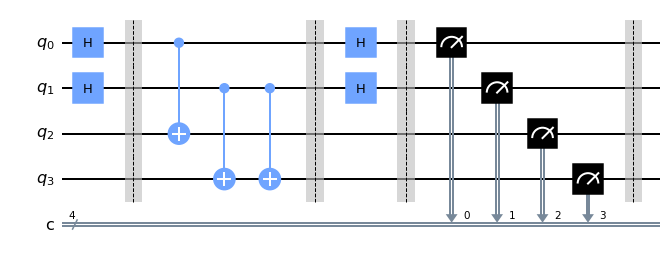

In [ ]:
s_circuit = QuantumCircuit(n*2, n*2)

s_circuit.h(range(n))
s_circuit.barrier()

s_circuit = s_circuit + simon_oracle(input_a)

s_circuit.barrier()

s_circuit.h(range(n))
s_circuit.barrier()


s_circuit.measure(range(n*2),range(n*2))
s_circuit.barrier()
s_circuit.draw(output = 'mpl')



In [ ]:
s_circuit

In [ ]:
from qiskit.tools.visualization import plot_histogram

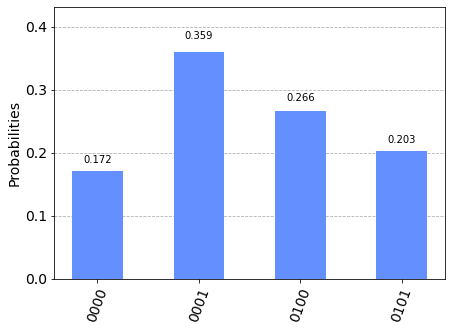

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(s_circuit, shots=64)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
#from qiskit.visualization import array_to_latex
#array_to_latex(results, prefix="\\text{Statevector} = ")

In [ ]:
import matplotlib.pyplot as plt


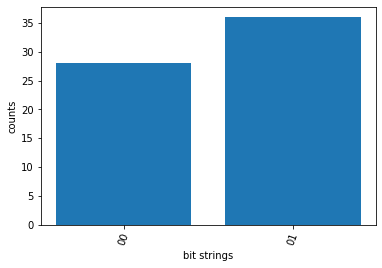

In [ ]:
new_results = {}
for bitstring, count in counts.items():
    # Only keep the outcomes on first n qubits
    trunc_bitstring = bitstring[n:]
    # Add the count to that of the of truncated bit string
    new_results[trunc_bitstring] = new_results.get(trunc_bitstring, 0) + count

plt.bar(new_results.keys(), new_results.values())
plt.xlabel('bit strings');
plt.ylabel('counts');
plt.xticks(rotation=70)
plt.show()


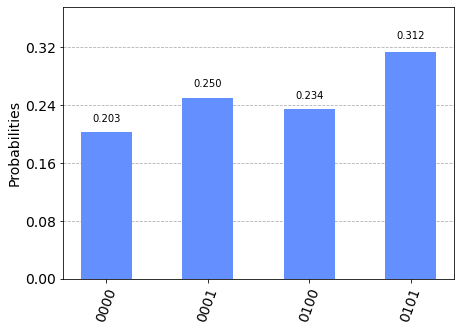

In [ ]:
backend = Aer.get_backend('qasm_simulator')
results = execute(s_circuit, backend=backend, shots = 64).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
IBMQ.save_account('8195b6aaf12fd1420ba9ba3bb20f477a8a81edf6c97397dad6e537b89b49f5f10f4fe7aa0b87e02a784be33e523c4933bb36a7beb00864f8ef72e126087b58f5') 

configrc.store_credentials:WARNING:2022-02-09 17:29:27,731: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_manila')
print("least busy backend: ", qcomp)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 64
job = execute(s_circuit, backend = qcomp, shots=shots)
job_monitor(job)
job_monitor(job, interval=2)

ibmqfactory.load_account:WARNING:2022-02-09 17:29:27,969: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manila
Job Status: job has successfully run
Job Status: job has successfully run


In [ ]:
from sympy import Matrix
import matplotlib.pyplot as plt

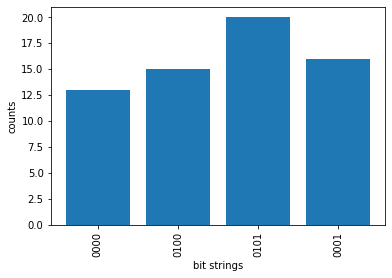

In [ ]:
plt.bar(counts.keys(), counts.values());
plt.xlabel('bit strings');
plt.ylabel('counts');
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_results = {}
for bitstring, count in counts.items():
    # Only keep the outcomes on first n qubits
    
    trunc_bitstring = bitstring[n:]
    # Add the count to that of the of truncated bit string
    new_results[trunc_bitstring] = new_results.get(trunc_bitstring, 0) + count

In [ ]:
if len(new_results.keys()) < len(input_a):
    raise Exception ('System will be underdetermined. Minimum ' + str(n) + ' bistrings needed, but only '
                     + str(len(new_results.keys())) +' returned. Please rerun Simon\'s algorithm.')
string_list = []

for key in new_results.keys():
#     if key!= "0"*n:
    string_list.append( [ int(c) for c in key ] )
    
print('The result in matrix form is :')
for a in string_list:
    print(a)

The result in matrix form is :
[0, 0]
[0, 1]


In [ ]:
import numpy as np

In [ ]:
M=Matrix(string_list).T
# Construct the agumented matrix
M_I = Matrix(np.hstack([M,np.eye(M.shape[0],dtype=int)]))

# Perform row reduction, working modulo 2. We use the iszerofunc property of rref
# to perform the Gaussian elimination over the finite field.
M_I_rref = M_I.rref(iszerofunc=lambda x: x % 2==0)


# In row reduced echelon form, we can end up with a solution outside of the finite field {0,1}.
# Thus, we need to revert the matrix back to this field by treating fractions as a modular inverse.
# Since the denominator will always be odd (i.e. 1 mod 2), it can be ignored.

# Helper function to treat fractions as modular inverse:
print(M_I)

Matrix([[0, 0, 1, 0], [0, 1, 0, 1]])


In [ ]:
s = input_a

In [ ]:
def mod2(x):
  return x.as_numer_denom()[0] % 2

# Apply our helper function to the matrix
M_I_final = M_I_rref[0].applyfunc(mod2)

# Extract the kernel of M from the remaining columns of the last row, when s is nonzero.
if all(value == 0 for value in M_I_final[-1,:M.shape[1]]):
  result_s="".join(str(c) for c in M_I_final[-1,M.shape[1]:])

# Otherwise, the sub-matrix will be full rank, so just set s=0...0
else:
  result_s='0'*M.shape[0]

# Check whether result_s is equal to initial s:
print('Secret string: ' + s)
print('Result string: ' + result_s)
if (result_s == s):
  print('We found the correct answer.')
else:
  print('Error. The answer is wrong!')

Secret string: 10
Result string: 10
We found the correct answer.
